### import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### data acquisition

In [2]:
df=pd.read_csv("C:/Users/san/Downloads/StudentsPerformance.csv")

#### data exploration

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### check datatypes

In [5]:
display(df.shape)
display(df.info())

(1000, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

#### Check statistics

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### check Missing Values

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Check duplicates

In [13]:
df.duplicated().sum()

0

#### check unique values

In [15]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### check numerical columns and categorical columns

In [22]:
num_feat=[feat for feat in df.columns if df[feat].dtypes!='O']
cat_feat=[feat for feat in df.columns if df[feat].dtypes=='O']

print('no. of numerical features are {} and are {} :'.format(len(num_feat),num_feat))
print('no. of categorical features are {} and are {} :'.format(len(cat_feat),cat_feat))

no. of numerical features are 3 and are ['math score', 'reading score', 'writing score'] :
no. of categorical features are 5 and are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] :


In [31]:

for i in cat_feat:
    print(f"the classes of the feature {i} is {df[i].unique()} \n")




the classes of the feature gender is ['female' 'male'] 

the classes of the feature race/ethnicity is ['group B' 'group C' 'group A' 'group D' 'group E'] 

the classes of the feature parental level of education is ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

the classes of the feature lunch is ['standard' 'free/reduced'] 

the classes of the feature test preparation course is ['none' 'completed'] 



#### Feature Engineering

In [24]:
df['tot_marks']=df['math score']+df['reading score']+df['writing score']
df['Avg_marks']=df['tot_marks']/3

In [25]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,tot_marks,Avg_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [41]:
a=['math score','reading score','writing score']
for i in a:
    print(f"total number of students in {i} that got full marks is {df[i][df[i]==100].count()}\n")
    print(f"total number of students in {i} that got fail marks is {df[i][df[i]<=20].count()}")
    



total number of students in math score that got full marks is 7

total number of students in math score that got fail marks is 4
total number of students in reading score that got full marks is 17

total number of students in reading score that got fail marks is 1
total number of students in writing score that got full marks is 14

total number of students in writing score that got fail marks is 3


#### insights: students got highest score in reading and very least score in maths

#### Data Visualization

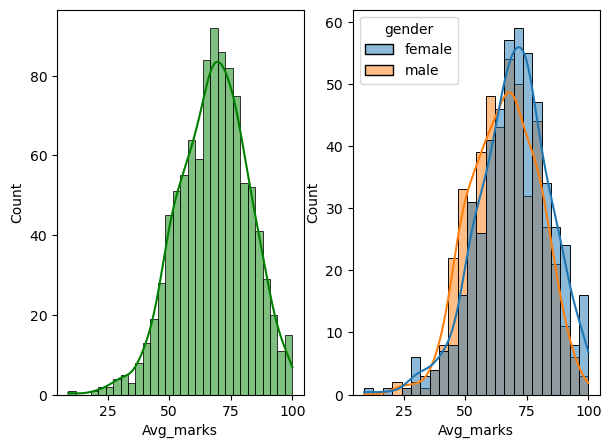

In [57]:
fig, axes = plt.subplots(1,2,figsize=(7,5))
plt.subplot(121)
sns.histplot(data=df,x='Avg_marks',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Avg_marks',kde=True,hue='gender')
plt.show()


#### insights : female are getting more scores than male

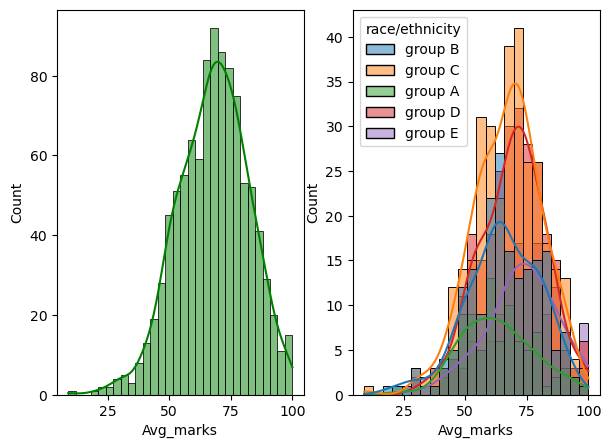

In [63]:
fig, axes = plt.subplots(1,2,figsize=(7,5))
plt.subplot(121)
sns.histplot(data=df,x='Avg_marks',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Avg_marks',kde=True,hue='race/ethnicity')
plt.show()

#### insights : Group D race people got highest avgscore and group A has the lowest Avg Score

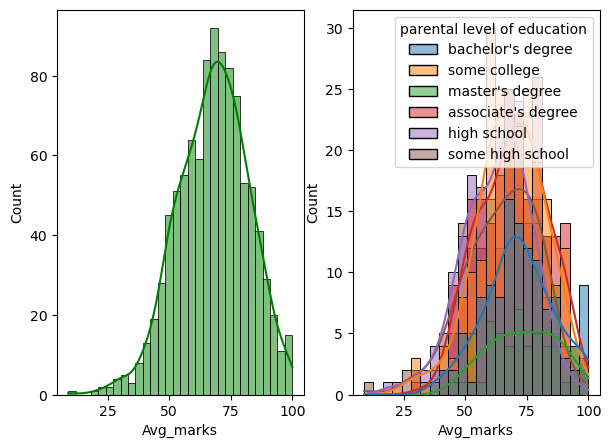

In [64]:
fig, axes = plt.subplots(1,2,figsize=(7,5))
plt.subplot(121)
sns.histplot(data=df,x='Avg_marks',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Avg_marks',kde=True,hue='parental level of education')
plt.show()

#### insights:  parents that are from just high schoola nd from some college ..children scored highest


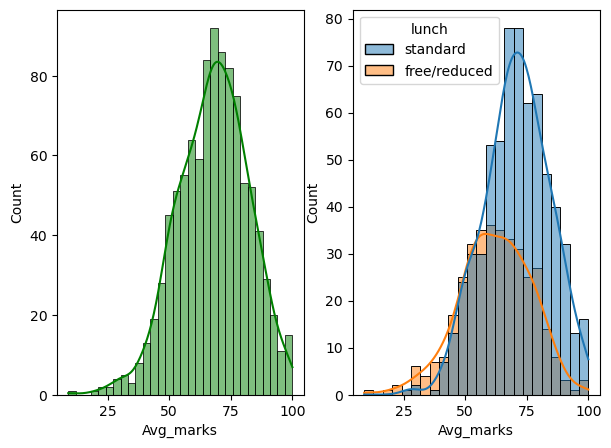

In [65]:
fig, axes = plt.subplots(1,2,figsize=(7,5))
plt.subplot(121)
sns.histplot(data=df,x='Avg_marks',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Avg_marks',kde=True,hue='lunch')
plt.show()

#### insights : 'standard lunch having' students scored well

#### Maximumum score of students in all three subjects

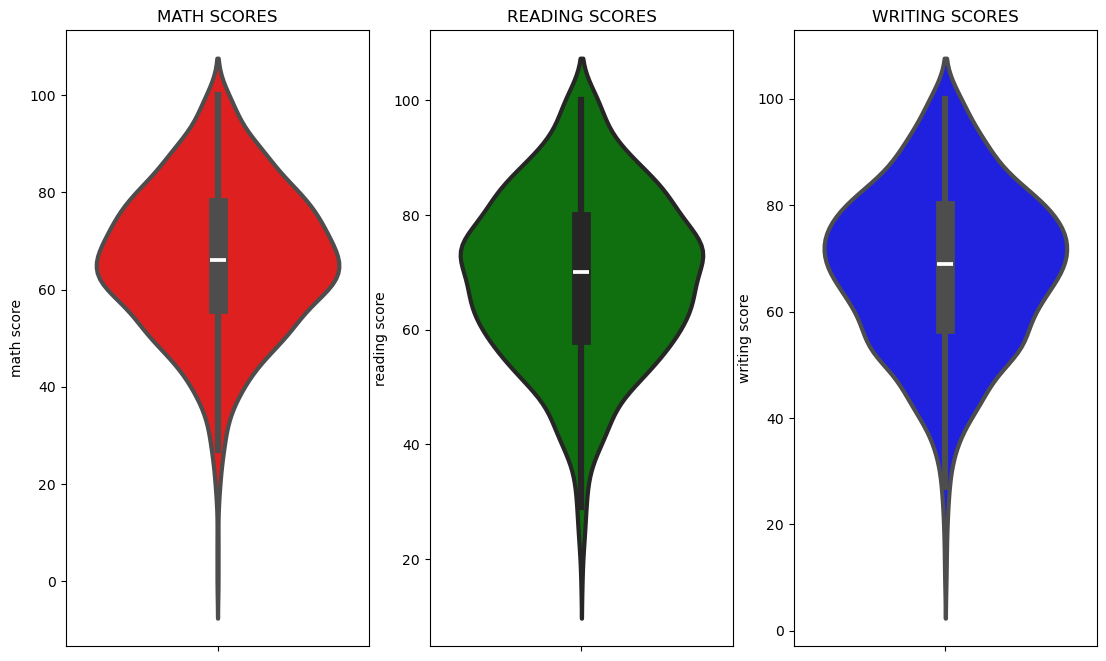

In [66]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

Multivariate analysis using pieplot

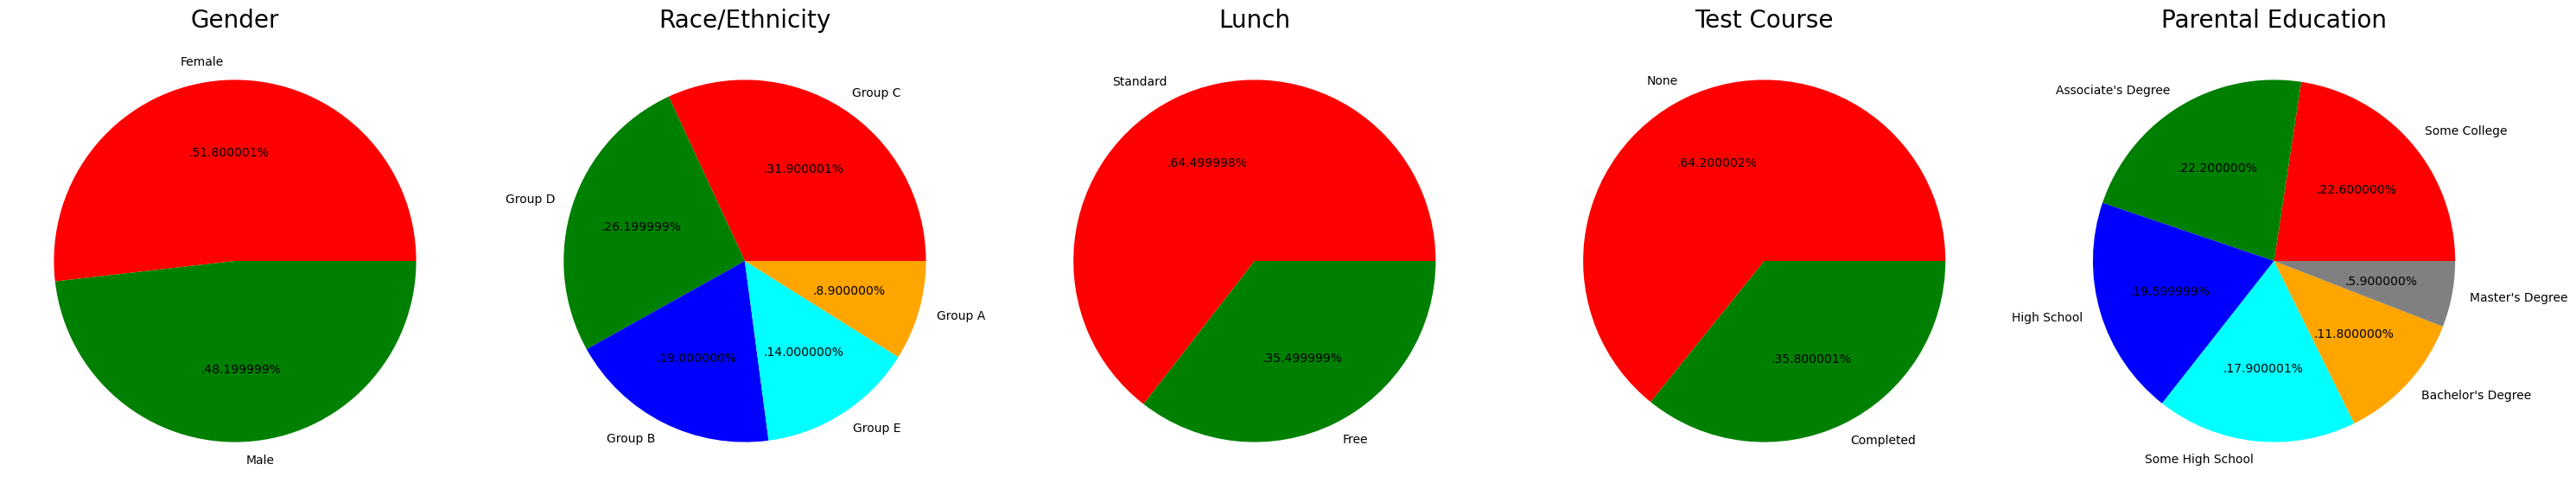

In [67]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Feature Wise Visualization

#### GENDER COLUMN--- univariate Analysis (( How is distribution of Gender ? )) and Bivariate Analysis (( Is gender has any impact on student's performance ? ))

####  univariate Analysis

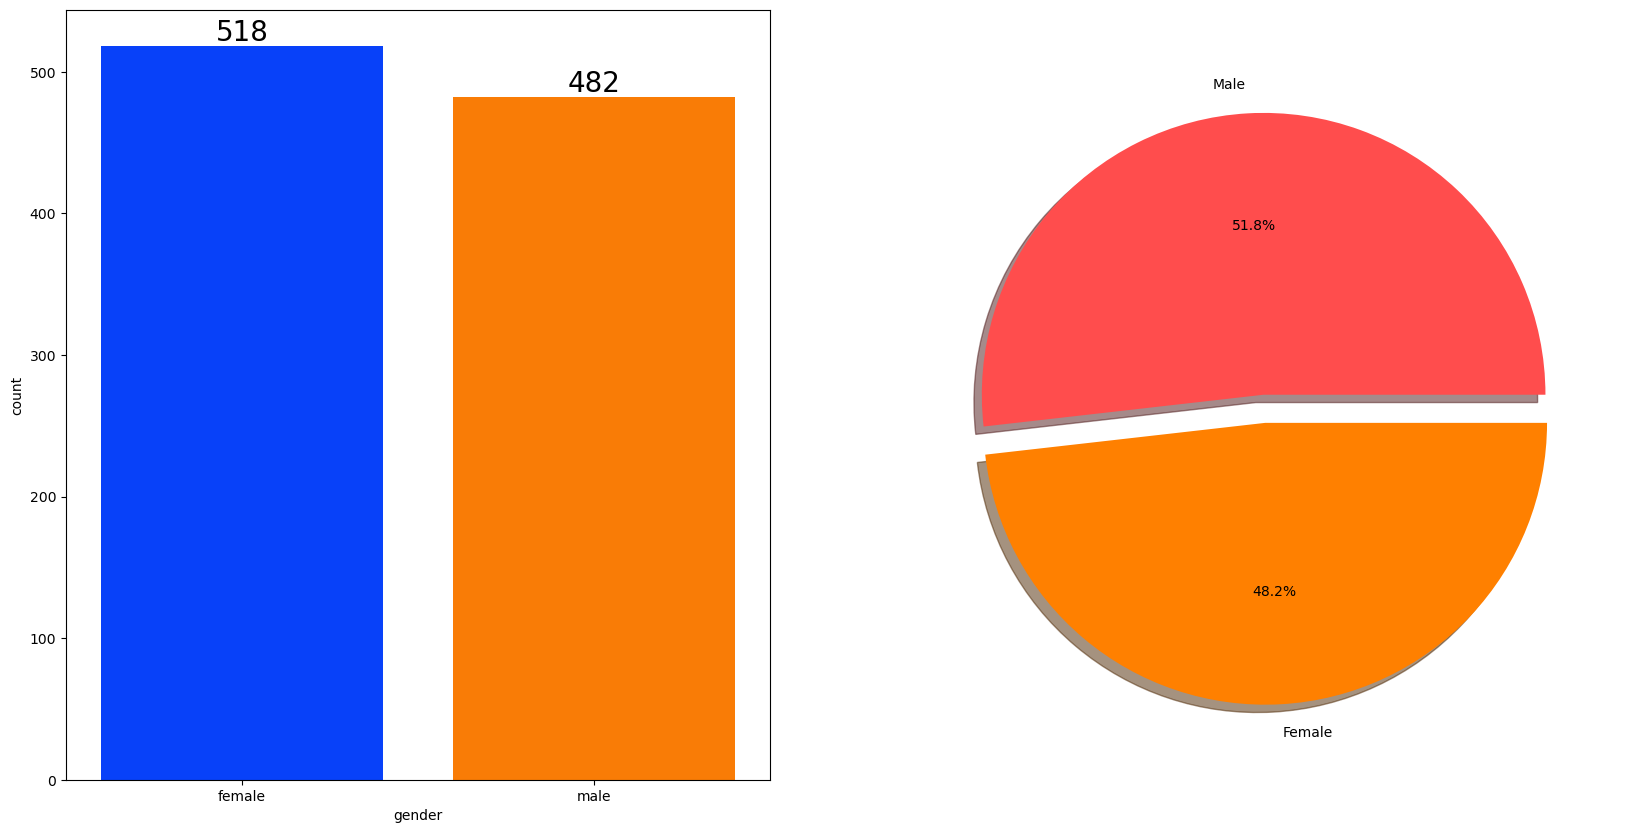

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Bivariate Analysis (( Is gender has any impact on student's performance ? ))

In [74]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,tot_marks,Avg_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [80]:
gender_group = df[['gender','math score','reading score','writing score','tot_marks','Avg_marks']].groupby('gender')
gender_group

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

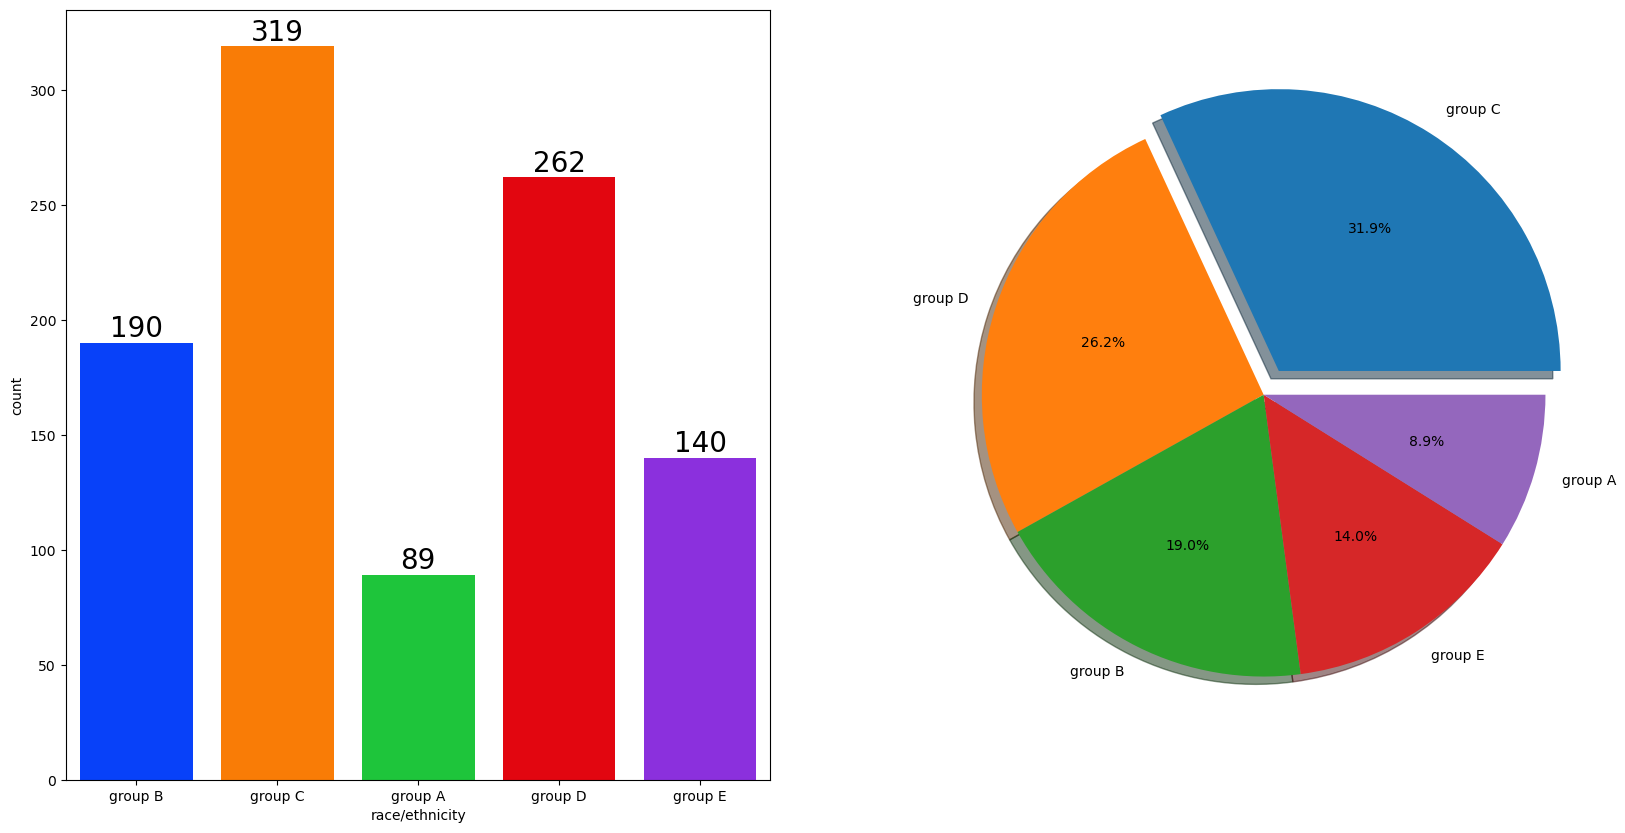

In [82]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   


#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [84]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

#### CHECKING OUTLIERS

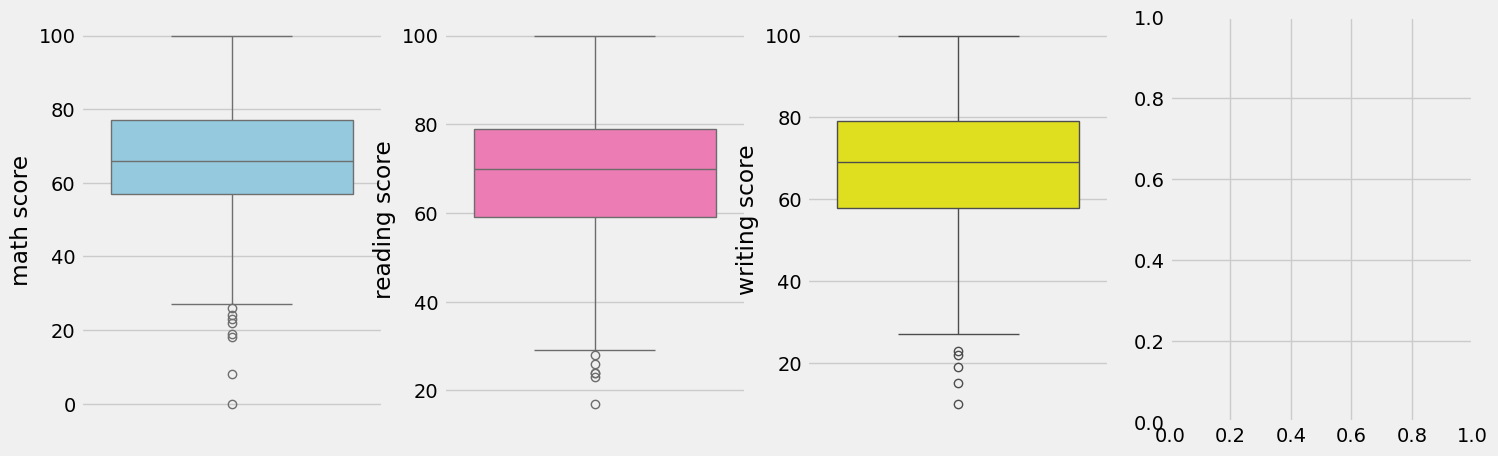

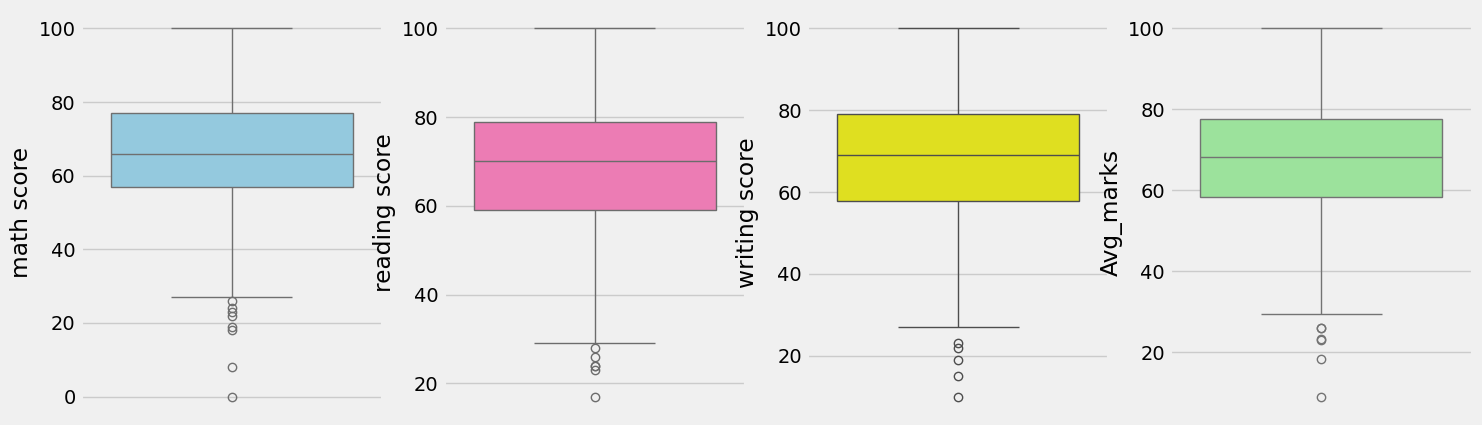

In [88]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Avg_marks'],color='lightgreen')
plt.show()

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

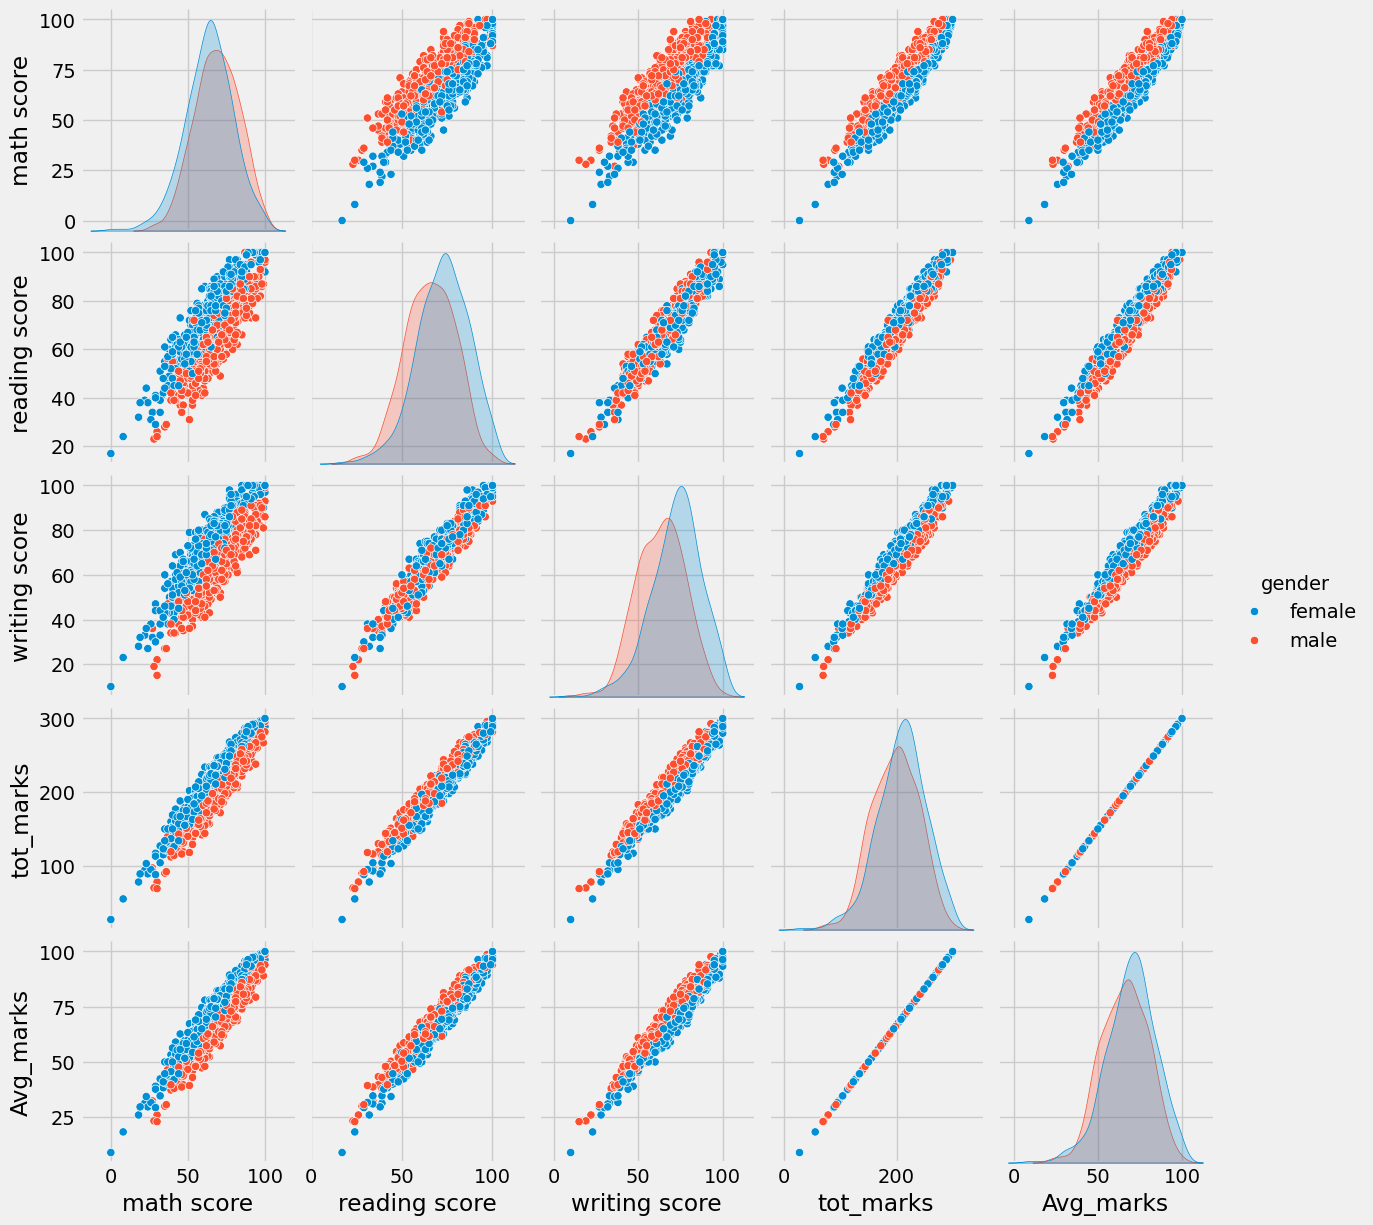

In [89]:
sns.pairplot(df,hue = 'gender')
plt.show()